# HTTP 통신
- HTTP 통해서 통신하는 순간 HTML을 사용하기 때문에 HTML을 파싱할 수 있어야 한다.
- TCP/IP 통신이므로 통신 동안은 반드시 연결 되어있다.
- request
    - 브라우저가 자동으로 붙여주는 것이 많다.
    - header를 열어 확인해야 한다.
    - user-agent 통해서 사용자의 브라우저를 확인하여 정상적인 사용자인지 확인한다.
    - text/html, \*/\*
    - BODY는 post 방식에서 볼 것이다.
    - get은 글자만 보내야 하고, 길이 제한이 있다.
    - post 방식은 묶어서 body에 넣어서 보낸다. 길이 제한이 없다.

# 크롤링, 스크래핑

- Opt-in : 정보 수집을 명시적으로 동의 할 때에만 정보수집 가능; whitelist
- Opt-out : 정보 수집을 명시적으로 거부할 때에만 정보수집 중단; blacklist
    - 전세계적으로 합법이다.
    - 상대방이 명시적으로 거부 의사를 밝혔는가가 중요하다.
    - 합법 : 검색엔진, 가격비교 등 (공익을 목적으로하기 때문에)
    - 위법 : 사이트 운영자의 의사에 반하지 않으면 합법
        - 나 대신 봇이 로그인을 하여 정보를 모아오는 경우
        - 여러번씩 request를 날릴 수 있다. -> 1000번 10000번이 될 수 있다. 한정된 트래픽 안에서 봇이 너무 많이 차지해서 정상적인 이용자가 이용을 못하기 때문에 불법이 된다. -> 일정한 텀을 두거나 request를 제한해야한다.
        - 지적재산권 : 소유물, 창작물로 인정을 받기 때문에 막 이용하면 안된다.
        - 이용방침 : 사이트에서 사용하지 말라는 것을 사용하면 안된다. 약관을 확인해야한다.

1. url/robots.txt
    - Crawler와 같은 bot 접근을 제어하기 위한 규약.
    - 대상 봇, 수집 여부, 수집 범위 등 기술
2. Crawl delay
    - 사이트에 최대한 부담 지양
3. Term of use 
    - 사이트 이용방침(약관) 준수
4. Public content
    - 지적재산권 침해 여부 주의
5. Authentication-based sites
    - 민감한 정보 수집 주의

## urllib
- HTTP라는 객체를 감싸고 있는 단계 
- requests의 하위 레벨.
- HTTP와 requests중간에 있기 때문에 컨트롤 해야 한다.
- urllib.request     : opening and reading URLs : 전체 주소이기 때문에 파싱을 통해 URL만들어줘야한다.
- urllib.error       : Containing the exceptions raised by urllib.request
- urllib.parse       : Parsing URLs
- urllib.robotparser : Parsing robots.txt files : 읽을 수 있는지 없는지 알려준다. 정확히 잘 안 돈다. 직접 코드를 통해 확인할 수 있다. :으로 split해서 확인. 또는 정규식 사용
- urllib.response    : Used ineternally by the urllib.request module

robotparser
- 우리 agent가 긁을 수 있는지 없는지 robots.txt를 확인하여 True/False로 알려준다.


In [1]:
from urllib import robotparser

In [2]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
robot.can_fetch("Yeti", "/main/imagemontage")

True

In [3]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
robot.can_fetch("*", "/main/imagemontage")

False

urllib를 사용하는 경우 urlopen(str) 을 이용하여 요청을 보낸다.

In [6]:
from urllib import request

resp = request.urlopen("https://www.google.com")
#url을 받아온다.
print(resp.geturl())
# 요청 결과를 알려주는 코드를 받는다.(200, 404, 403, 500 등...)
print(resp.getcode())
print(resp.info())

# 상대방이 서버에서 응답한 header
resp.getheaders()

https://www.google.com
200
Date: Thu, 11 Jul 2019 13:12:20 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-11-13; expires=Sat, 10-Aug-2019 13:12:20 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=LtVU2gOOsujfNwx3lETgzg67ZLVo5EaoDNbQHgndpvL1glZfg-_jcum_ISh9Ng9iTyOKTrRwV5J9hjFGEJJeSjgnw2oM_3OrizQb0fhAAHvQzpIa2ZKY99MyAqF91WyNVgIgZ4-XqtQlN1zAGwbPMWj5vGOM4SqkTq-kCRIfwd0; expires=Fri, 10-Jan-2020 13:12:20 GMT; path=/; domain=.google.com; HttpOnly
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




[('Date', 'Thu, 11 Jul 2019 13:12:20 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-11-13; expires=Sat, 10-Aug-2019 13:12:20 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=LtVU2gOOsujfNwx3lETgzg67ZLVo5EaoDNbQHgndpvL1glZfg-_jcum_ISh9Ng9iTyOKTrRwV5J9hjFGEJJeSjgnw2oM_3OrizQb0fhAAHvQzpIa2ZKY99MyAqF91WyNVgIgZ4-XqtQlN1zAGwbPMWj5vGOM4SqkTq-kCRIfwd0; expires=Fri, 10-Jan-2020 13:12:20 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'quic=":443"; ma=2592000; v="46,43,39"'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

- resp.status를 사용하면 getcode()처럼 요청에대한 성공 여부를 받을 수 있다.
- resp.reason을 사용하면 그 상태(status)의 이유를 알 수 있다.

In [7]:
print(resp.status)
print(resp.reason)
resp.info()

200
OK


구글의 경우 검색창은 bot의 출입이 불가능하다. bot으로 간주 하는 기준은 정상적인 agent가 없으면 bot으로 간주하므로 header에 agent를 추가해서 접근한다.

In [8]:
resp = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
resp.code, resp.reason

HTTPError: HTTP Error 403: Forbidden

403 에러는 내게 권한이 없을 때 발생한다.

#### status code
- 200대 : Success
- 400대 : Client error
- 500대 : Server error
- 위의 상태 코드를 알고 코드 상태에 따라 분기하여 처리한다.

In [10]:
from urllib import error

try:
    resp = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Thu, 11 Jul 2019 13:19:40 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




위의 에러를 해결하기 위해 user-agent를 header에 추가하여 bot임을 숨긴다.
- urllib으로는 header에 값을 넣을 수 없다.
- Request 객체를 생성해야 한다.

In [12]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

try:
    req = request.Request("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81", headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
else:
    print(resp.code, resp.status, resp.reason, req.headers)

200 200 OK {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}


결과 출력

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>\xeb\xb0\x95\xeb\xb3\xb4\xec\x98\x81 - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="vltPlO4JbRXTT7Vu2Goz4g==">(function(){window.google={kEI:\'gTgnXe7rFsT38gX4pqegCQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_gTgnXe7rFsT38gX4pqegCQ\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=goo
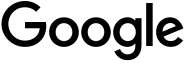
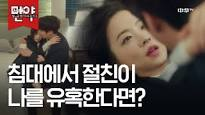
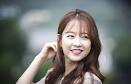
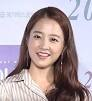
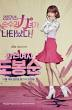
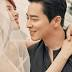

In [14]:
resp.read()

통신할 때는 바이트형태이어야 하므로 한글이 들어가면 에러가 발생한다.
- urlparse를 이용한다.
- urlparse를 이용하면 부분부분 잘라준다.

In [16]:
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

try:
    req = request.Request("https://www.google.com/search?q=박보영", headers=headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
else:
    print(resp.code, resp.status, resp.reason, req.headers)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 14-16: ordinal not in range(128)

urljoin - 호스트 부분을 놔두고 뒷부분을 바꿔준다.

In [22]:
from urllib import parse

url = parse.urlparse("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
print(url)
url = parse.urljoin("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81", "/search/about")
print(url)

url = parse.urlencode({"q":"파이썬"})
print(url)
# 띄어쓰기를 + 로 표현
url = parse.quote_plus('파 이 썬')
print(url)

ParseResult(scheme='https', netloc='www.google.com', path='/search', params='', query='q=%EB%B0%95%EB%B3%B4%EC%98%81', fragment='')
https://www.google.com/search/about
q=%ED%8C%8C%EC%9D%B4%EC%8D%AC
%ED%8C%8C+%EC%9D%B4+%EC%8D%AC


## requests 패키지
- urllib보다 상위 레벨의 패키지이다.
- CRUD 방식으로 사용할 수 있다.
- 사용 방법이 심플하다.
- urllib는 한 번 불러오면 연결이 끊어졌지만 requests를 사용하면 여러번 불러서 사용할 수 있다.
- 테스트 사이트 http://httpbin.org/
- request후 받환 받은 객체에 .text를 붙여서 내용을 볼 수 있다.

In [23]:
import requests

In [29]:
requests.get("http://httpbin.org/get")

<Response [200]>

In [30]:
requests.post("http://httpbin.org/post")

<Response [200]>

In [31]:
resp = requests.request("get",
                       "http://httpbin.org/get",
                       params={"key":"value"})
print(resp.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.140, 163.152.3.140", 
  "url": "https://httpbin.org/get?key=value"
}



post방식은 params가 아닌 data라고 값을 넣어준다.
- form에 들어간다

In [32]:
resp = requests.request("post",
                       "http://httpbin.org/post",
                       data={"key":"value"})
print(resp.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "163.152.3.140, 163.152.3.140", 
  "url": "https://httpbin.org/post"
}



requests에서의 에러 핸들링

In [35]:
headers = None

내가 원하는 에러를 발생시켜주는 사이트
- https://www.crawlertest.com/status_codes/status_403

In [37]:
def download(method, url, param=None, data=None):
    try:
        resp = requests.request(method, url, params=param, data=data, headers=headers)
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as e:
        print(e.response.status_code)
        print(e.response.reason)
    return resp

html = download("get", "https://www.crawler-test.com/status_codes/status_403")

403
Forbidden


재시도 기능 추가하기

In [38]:
import time

In [43]:
def download(method, url, param=None, data=None, timeout=1, maxretries=3):
    try:
        resp = requests.request(method, url, params=param, data=data, headers=headers)
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries > 0:
            time.sleep(timeout)
            print(maxretries)
            print("재시도")
            resp = download(method, url, param, data, timeout, maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

html = download("get", "https://www.crawler-test.com/status_codes/status_500")

3
재시도
2
재시도
1
재시도
500
Internal Server Error


In [46]:
html = download("get", "http://httpbin.org/get", {"key":"value"})
print(html.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.140, 163.152.3.140", 
  "url": "https://httpbin.org/get?key=value"
}



In [49]:
import json

res = json.loads(html.text)
print(type(res), res)

<class 'dict'> {'args': {'key': 'value'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.21.0'}, 'origin': '163.152.3.140, 163.152.3.140', 'url': 'https://httpbin.org/get?key=value'}


공공 api를 download 함수를 사용하여 불러보자

In [52]:
html = download("get",
               "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty",
               {"serviceKey":"aeUcMWlWBcx3lsfgdtp3Nxx90I5HujhKwlPU2tTwN4Nn9DQB4mhBMKheJj6cv%2BmD1hM%2BibpzVr9WRX0TIK5U1A%3D%3D",
               "numOfRows":10,
                "pageSize":10,
                "pageNo":1,
                "startPage":1,
                "stationName":"성북구",
                "dataTerm":"DAILY",
                "ver":"1.3",
                "_returnType":"JSON" 
               })

print(html.text)
obj = json.loads(html.text)

<?xml version="1.0" encoding="UTF-8"?>




<response>
	<header>
		<resultCode>30</resultCode>
		<resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg>
	</header>
</response>



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

위의 예제에서 SERVICE KEY가 에러가 난다면 정상이다. 
이는 requests가 자동으로 encoding해주면서 %글자가 잘못된 side effect를 가지고 오기 때문에 ServiceKey를 unquote해주어야 한다. 

requests는 requests.compat.unquote()를 사용하여 unquote해준다.

In [54]:
key = requests.compat.unquote("aeUcMWlWBcx3lsfgdtp3Nxx90I5HujhKwlPU2tTwN4Nn9DQB4mhBMKheJj6cv%2BmD1hM%2BibpzVr9WRX0TIK5U1A%3D%3D")
html = download("get",
               "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty",
               {"serviceKey":key,
               "numOfRows":10,
                "pageSize":10,
                "pageNo":1,
                "startPage":1,
                "stationName":"성북구",
                "dataTerm":"DAILY",
                "ver":"1.3",
                "_returnType":"JSON" 
               })

print(html.text)
obj = json.loads(html.text)

{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.4","dataTerm":"","dataTime":"2019-07-11 22:00","khaiGrade":"1","khaiValue":"35","mangName":"도시대기","no2Grade":"1","no2Value":"0.010","numOfRows":"10","o3Grade":"1","o3Value":"0.021","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"3","pm10Value24":"6","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"2","pm25Value24":"3","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"","so2Value":"-","stationCode":"","stationName":"","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-11 21:00","khaiGrade":"1","khaiValue":"30","mangName":"도시대기","no2Grade":"1","no2Value":"0.013","numOfRows":"10","o3Grade":"1","o3Value":"0.018","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"5","pm10Value24":"7","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"3","pm25Value24":"3","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2

In [55]:
obj

{'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.4',
   'dataTerm': '',
   'dataTime': '2019-07-11 22:00',
   'khaiGrade': '1',
   'khaiValue': '35',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.010',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.021',
   'pageNo': '1',
   'pm10Grade': '1',
   'pm10Grade1h': '1',
   'pm10Value': '3',
   'pm10Value24': '6',
   'pm25Grade': '1',
   'pm25Grade1h': '1',
   'pm25Value': '2',
   'pm25Value24': '3',
   'resultCode': '',
   'resultMsg': '',
   'rnum': 0,
   'serviceKey': '',
   'sidoName': '',
   'so2Grade': '',
   'so2Value': '-',
   'stationCode': '',
   'stationName': '',
   'totalCount': '',
   'ver': ''},
  {'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.5',
   'dataTerm': '',
   'dataTime': '2019-07-11 21:00',
   'khaiGrade': '1',
   'khaiValue': '30',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.013',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.01